In [3]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales.csv to Video_Games_Sales.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objs as go


data = pd.read_csv('Video_Games_Sales.csv')
print("This is Video Games Sales Dataset at Dec 2016\n")
data.info()
print("\n")
print(data.head())

This is Video Games Sales Dataset at Dec 2016

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(

In [5]:
#Remove ratings column as we don't want to do any analysis with them
col_remove = ['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating']
data_clear = data.drop(labels=col_remove, axis=1)
#axis 1 means remove column
data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [6]:
#Remove N/A
print(data_clear.isnull().sum())


data_clear=data_clear.dropna(axis=0)
data_clear.info()

print(data_clear.head())
print(data_clear.tail())

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
                       Name Platform  Year_o

What video game platforms are in the dataset?


In [7]:
data_clear.Platform.value_counts().index.sort_values()

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object')

Example showing repeated video game titles

In [8]:
GTA5=data_clear.loc[data_clear.Name == 'Grand Theft Auto V']
print(GTA5)

                    Name Platform  Year_of_Release   Genre  \
16    Grand Theft Auto V      PS3           2013.0  Action   
23    Grand Theft Auto V     X360           2013.0  Action   
42    Grand Theft Auto V      PS4           2014.0  Action   
165   Grand Theft Auto V     XOne           2014.0  Action   
1730  Grand Theft Auto V       PC           2015.0  Action   

                 Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
16    Take-Two Interactive      7.02      9.09      0.98         3.96   
23    Take-Two Interactive      9.66      5.14      0.06         1.41   
42    Take-Two Interactive      3.96      6.31      0.38         1.97   
165   Take-Two Interactive      2.81      2.19      0.00         0.47   
1730  Take-Two Interactive      0.39      0.69      0.00         0.09   

      Global_Sales  
16           21.04  
23           16.27  
42           12.61  
165           5.48  
1730          1.17  


In [9]:
data_clear.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000


Counting releases of video games by genre

Action, Adventure, Fighting, Puzzle, Racing, Sports


<Axes: title={'center': 'Count of Video Games by Genre'}, xlabel='count', ylabel='Genre'>

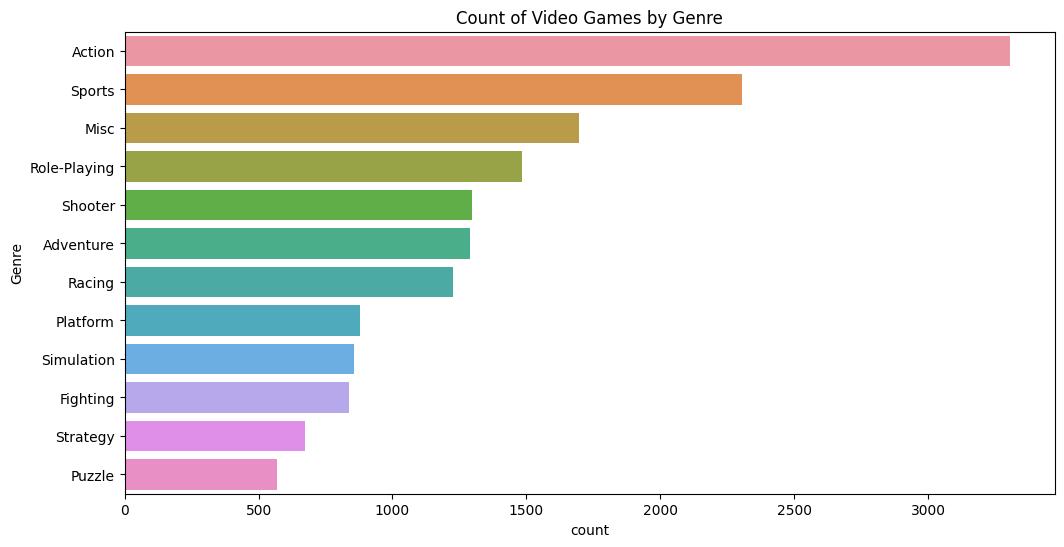

In [10]:
plt.figure(figsize=(12,6))
plt.title("Count of Video Games by Genre")
sns.countplot(y='Genre', data=data_clear, order=data_clear.Genre.value_counts().index)

Ten best games

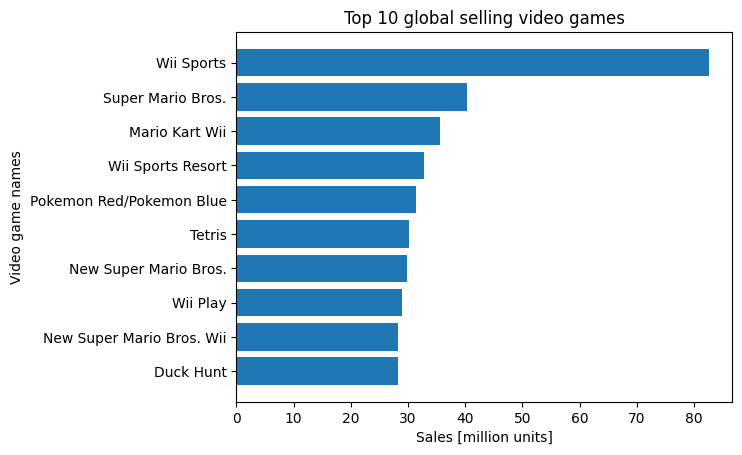

In [11]:
data_sales_sort = data_clear.sort_values(by=['Global_Sales'], ascending=False)
data_sales_sort_hd = data_sales_sort.head(10).sort_values(by=['Global_Sales'], ascending = True)
top10_games_gs = data_sales_sort_hd['Name'].head(10)
top10_sales_gs = data_sales_sort_hd['Global_Sales'].head(10)

fig, ax = plt.subplots()
p1 = ax.barh(top10_games_gs,top10_sales_gs)
ax.set_title('Top 10 global selling video games')
ax.set_xlabel('Sales [million units]')
ax.set_ylabel('Video game names')
#ax.bar_label(p1, label_type='center')

plt.show()

''' ------Heat map------'''

<ipython-input-12-da11d17ef22f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_clear.corr()


<Axes: title={'center': 'Heatmap of the Video Game Dataset'}>

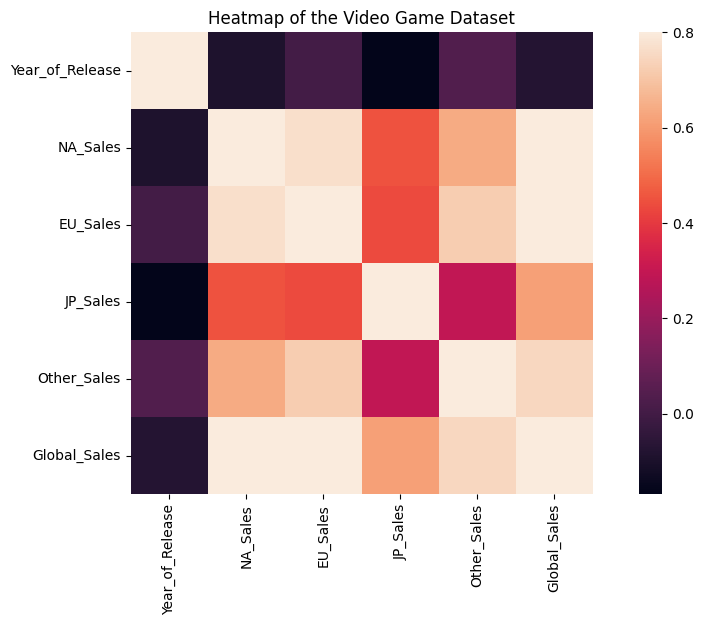

In [12]:
corr_mat = data_clear.corr()
plt.figure(figsize=(12,6))
plt.title("Heatmap of the Video Game Dataset")
sns.heatmap(corr_mat, vmax=.8, square=True)

In [13]:
print(data_clear.shape)
print(data_clear["Platform"].value_counts())

platform = Counter(data_clear['Name'].tolist()).most_common(15)
x = [x[0] for x in platform]
y = [x[1] for x in platform]

fig = go.Bar(x = x,
             y = y,
             marker = dict(color = 'rgba(0, 157, 220, 0.85)',
                         line=dict(color='rgb(25, 20, 20)',width=1.25)))

layout = go.Layout()
fig = go.Figure(data = fig, layout = layout)
fig.update_layout(title_text='Top 15 repeat Video Games')
fig.show()

(16416, 10)
PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [ ]:
TotalGenres = data['Global_Sales'].groupby(data['Genre']).sum().sort_values(ascending=False).to_frame()

fig = go.Figure(data=[go.Pie(labels=TotalGenres.index,
                             values=TotalGenres['Global_Sales'])])

fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width = 0.2)))

fig.update_layout(title_text='Video Game Sales by Genre')

fig.show()

In [ ]:
plat_year = data_clear.groupby(["Platform","Year_of_Release"], as_index=False).sum()
plat_year.head()

,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,1980.0,10.59,0.67,0.0,0.12,11.38
1,2600,1981.0,33.40,1.96,0.0,0.32,35.77
2,2600,1982.0,26.92,1.65,0.0,0.31,28.86
3,2600,1983.0,5.44,0.34,0.0,0.06,5.83
4,2600,1984.0,0.26,0.01,0.0,0.00,0.27


Text(0.5, 1.0, 'Xbox 360: Sales by Year')

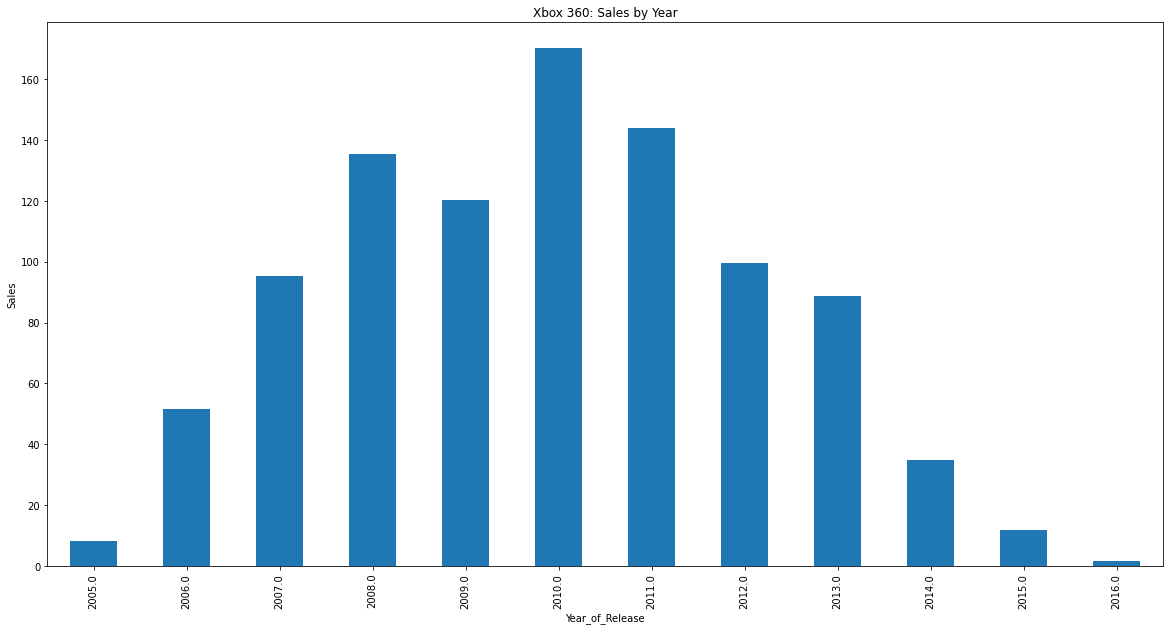

In [ ]:
xbox = (plat_year.Platform == "X360")
plat_year[xbox]
ax=plat_year[xbox].plot.bar("Year_of_Release","Global_Sales"   , figsize=(20,10), title= 'Xbox 360: Sales by Year',ylabel='Sales', legend=None)
ax.set_title('Xbox 360: Sales by Year')

Text(0.5, 1.0, 'PlayStation 3: Sales by Year')

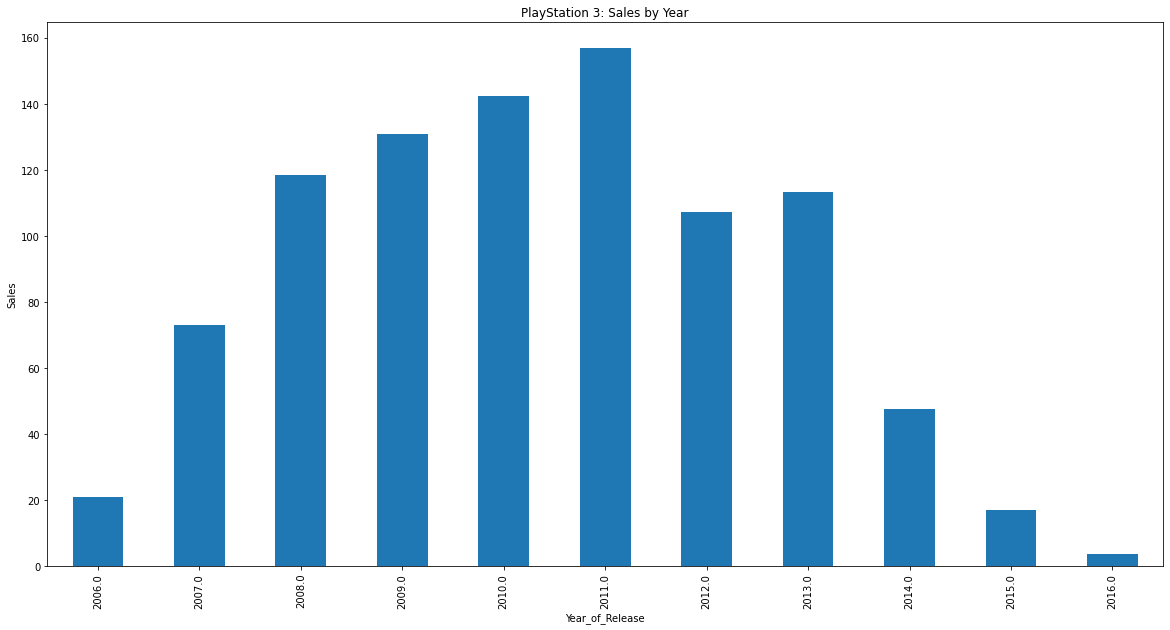

In [ ]:
ps = (plat_year.Platform == "PS3")
plat_year[ps]
ax=plat_year[ps].plot.bar("Year_of_Release","Global_Sales"   , figsize=(20,10),ylabel='Sales', legend=None)
ax.set_title('PlayStation 3: Sales by Year')

Text(0.5, 1.0, 'Boxplot of Individual Game Sales')

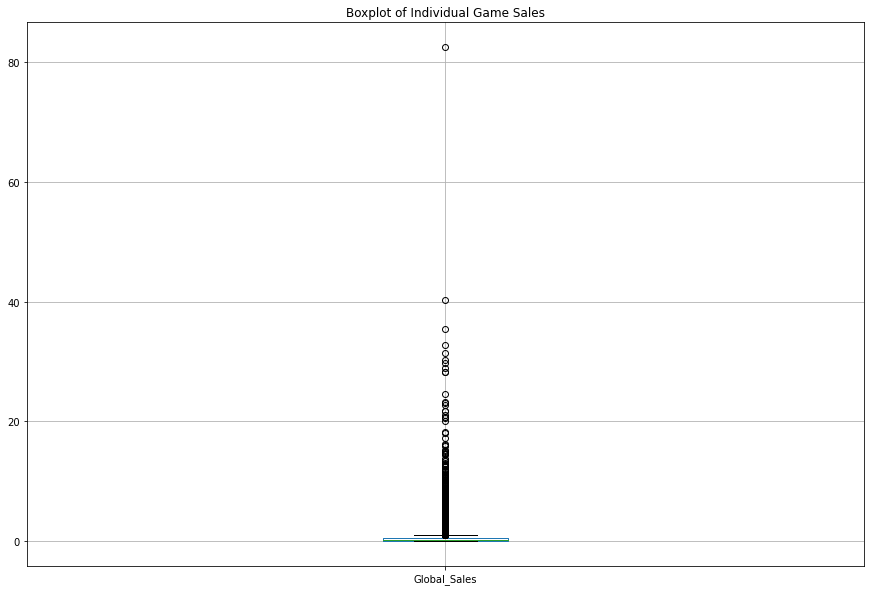

In [ ]:
boxplot = data_clear.boxplot(column='Global_Sales',figsize=(15,10))
plt.title('Boxplot of Individual Game Sales')